### Step 1: Importing the required libraries

In [4]:
# Importing the necessary libraries for implementing SARSA learning.

import numpy as np
import gym
import pickle

print("Gym version: ", gym.__version__)
print("Numpy Version: ", np.__version__)

Gym version:  0.24.0
Numpy Version:  1.23.5


### Step 2: Building the environment
Here, we will be using the ‘FrozenLake-v0’ environment which is preloaded into gym

In [5]:
#Building the environment
env = gym.make('FrozenLake-v1')

### Step 3: Initializing different parameters

In [7]:
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q # printing Q-table


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Step 4: Defining utility functions to be used in the learning process

In [8]:
#Function to choose the next action
def choose_action(state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + alpha * (target - predict)


### Step 5: Training the learning agent

In [ ]:
#Initializing the reward
reward=0

# Starting the SARSA learning
for episode in range(total_episodes):
	t = 0
	state1 = env.reset()
	action1 = choose_action(state1)

	while t < max_steps:
		#Visualizing the training
		env.render()
		
		#Getting the next state
		state2, reward, done, info = env.step(action1)

		#Choosing the next action
		action2 = choose_action(state2)
		
		#Learning the Q-value
		update(state1, state2, reward, action1, action2)

		state1 = state2
		action1 = action2
		
		#Updating the respective vaLues
		t += 1
		reward += 1
		
		#If at the end of learning process
		if done:
			break


### Step 6: Evaluating the performance

In [ ]:
#Evaluating the performance
print ("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)


In [ ]:
# Dumping the Q-table in pickle file for easy loading when needed.

with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

In [ ]:
# Q-Table Representation

# Q = [[0.61328675 0.58403178 0.59475622 0.60545697]
#  [0.56521894 0.11293677 0.50370929 0.60326189]
#  [0.59057488 0.58249108 0.57499097 0.59089953]
#  [0.57255264 0.01738344 0.57441336 0.59935962]
#  [0.62387633 0.5546865  0.71629256 0.11403143]
#  [0.         0.         0.         0.        ]
#  [0.64606929 0.71730524 0.73581135 0.11986364]
#  [0.         0.         0.         0.        ]
#  [0.61203901 0.70121817 0.69993882 0.79860727]
#  [0.1464226  0.87045385 0.16544007 0.13804508]
#  [0.91957935 0.91595476 0.57216828 0.68562543]
#  [0.         0.         0.         0.        ]
#  [0.         0.         0.         0.        ]
#  [0.81536073 0.03436849 0.87831349 0.70812791]
#  [0.95772482 0.88879209 0.92707794 0.99582979]
#  [0.         0.         0.         0.        ]]

In [ ]:
import numpy as np
import time 
import pickle
import gym
import os

env = gym.make('FrozenLake-v1') # Create an instance of the FrozenLake-v1 environment

# Un-pickling the pickle file using load() function. To convert from pickle to python object.
with open("frozenLake_qTable.pkl", 'rb') as f: 
	Q = pickle.load(f)

# Choosing the maximum value from the state and action
def choose_action(state):
	action = np.argmax(Q[state, :])
	return action

# Rendering the environment and choosing the best action based on policy
for episode in range(5):

	state = env.reset()
	print("*** Episode: ", episode)
	t = 0
	while t < 100:
		env.render()

		action = choose_action(state)  
		
		state2, reward, done, info = env.step(action)  
		
		state = state2

		if done:
			break

		time.sleep(0.5)
		os.system('clear')

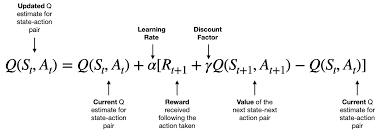

In [1]:
from IPython.display import Image
Image(filename='SARSA_Formula.png') 

In [1]:
# SARSA Algorithm Implementation

import numpy as np
import random

# Define the environment
n_states = 5
n_actions = 2
reward_table = np.array([[0, 1], [0, 0], [0, 0], [0, 0], [1, 0]])  # Rewards for each state-action pair

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.99
epsilon = 0.1

# Initialize the Q-table
q_table = np.zeros((n_states, n_actions))

# Define the SARSA algorithm
def sarsa(state, q_table, epsilon):
    # Choose the action using an epsilon-greedy policy
    if random.random() < epsilon:
        action = random.randint(0, n_actions - 1)
    else:
        action = np.argmax(q_table[state])
    
    # Take the chosen action and observe the new state and reward
    new_state = state + (2 * action - 1)  # Move left or right
    if new_state < 0 or new_state >= n_states:
        return state, action  # If the new state is invalid, return the current state and action
    reward = reward_table[state, action]
    
    # Choose the next action using an epsilon-greedy policy
    if random.random() < epsilon:
        next_action = random.randint(0, n_actions - 1)
    else:
        next_action = np.argmax(q_table[new_state])
    
    # Update the Q-table using the SARSA rule
    q_table[state, action] = q_table[state, action] + learning_rate * \
                             (reward + discount_factor * q_table[new_state, next_action] - q_table[state, action])
    
    return new_state, next_action

# Run the SARSA algorithm
state = 2  # Initial state
for i in range(100):
    state, _ = sarsa(state, q_table, epsilon)

print(q_table, end="\n\n")

# Obtain the optimal policy from the Q-table
optimal_policy = np.argmax(q_table, axis=1)

# Print the optimal policy
print("Optimal policy:")
for s in range(n_states):
    print(f"State {s}: Action {optimal_policy[s]}")

[[0.00000000e+00 2.43272530e+00]
 [1.90508246e+00 5.82769817e-04]
 [1.38758459e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]

Optimal policy:
State 0: Action 1
State 1: Action 0
State 2: Action 0
State 3: Action 0
State 4: Action 0
